### Coursera Assignment

In [8]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [9]:
data=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

In [10]:
data

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Add your code below following the instructions given in the course to complete the peer graded assignment

In [12]:
# Display the first few rows of the dataset
data.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,35-70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,> 70 years
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,35-70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,35-70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,35-70 years


In [13]:
# Set the style of the visualization
sns.set(style="whitegrid")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

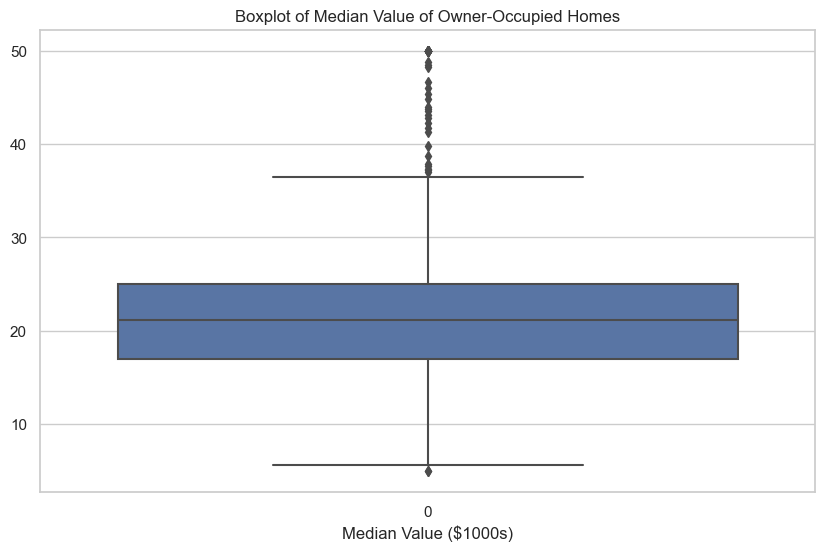

In [14]:
# 1. Boxplot for the "Median value of owner-occupied homes" (MEDV)
plt.figure(figsize=(10, 6))
sns.boxplot(data['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.xlabel('Median Value ($1000s)')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

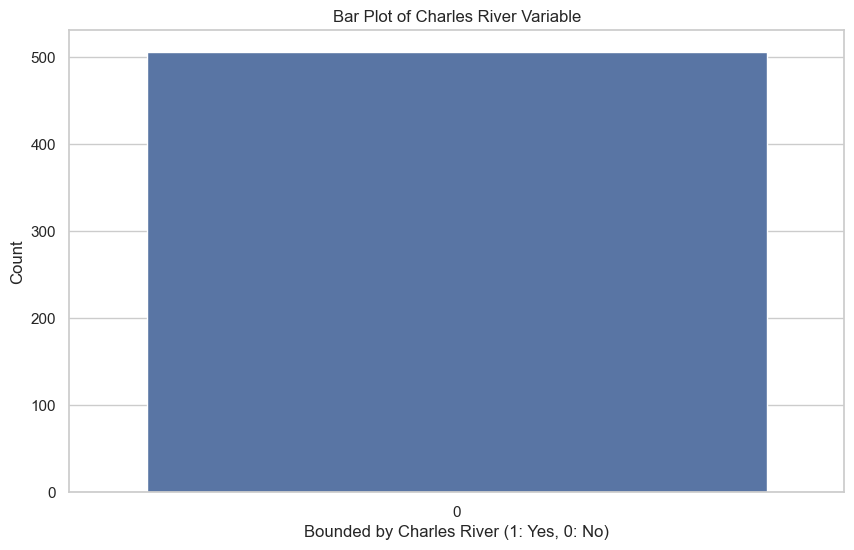

In [15]:
# 2. Bar plot for the Charles River variable (CHAS)
plt.figure(figsize=(10, 6))
sns.countplot(data['CHAS'])
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Bounded by Charles River (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

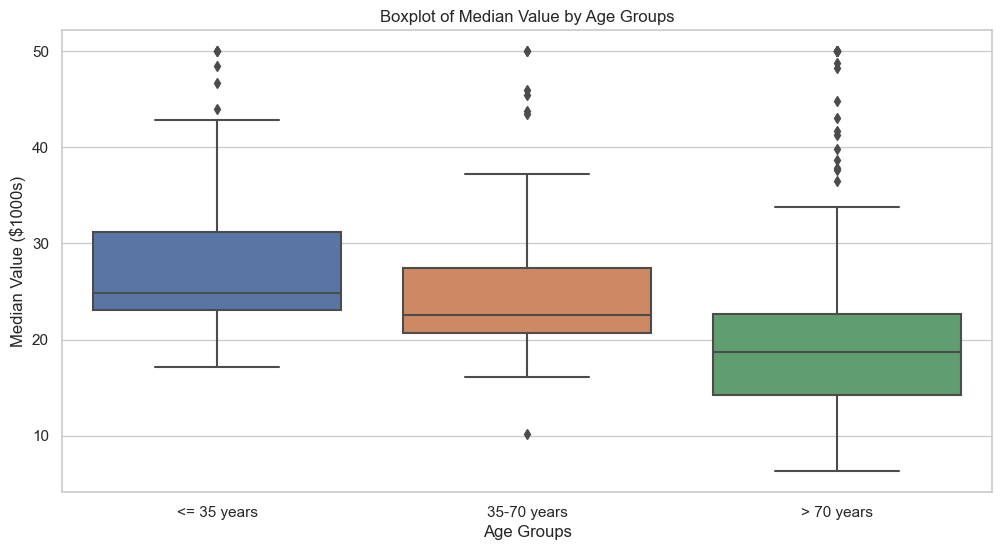

In [16]:
# 3. Boxplot for MEDV vs AGE
# Discretize the AGE variable
bins = [0, 35, 70, 100]
labels = ['<= 35 years', '35-70 years', '> 70 years']
data['AGE_group'] = pd.cut(data['AGE'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(12, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=data)
plt.title('Boxplot of Median Value by Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Median Value ($1000s)')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

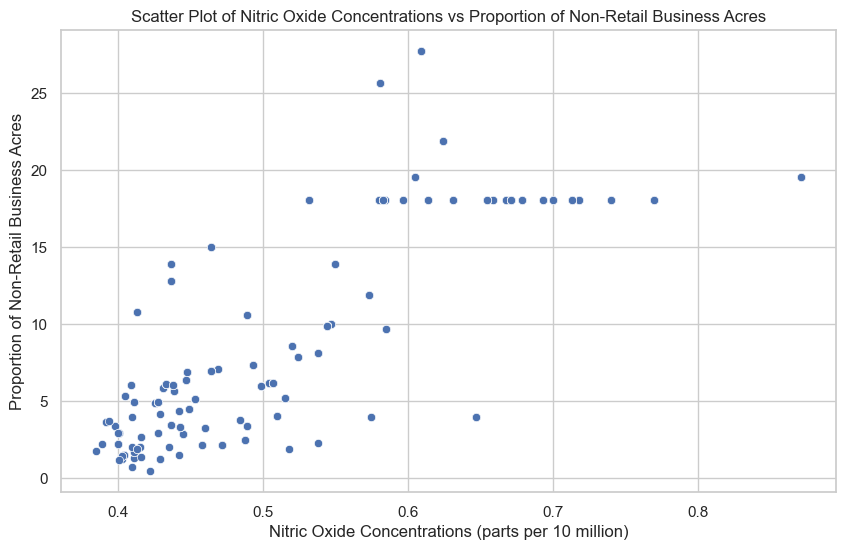

In [17]:
# 4. Scatter plot for NOX vs INDUS
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NOX', y='INDUS', data=data)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations (parts per 10 million)')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

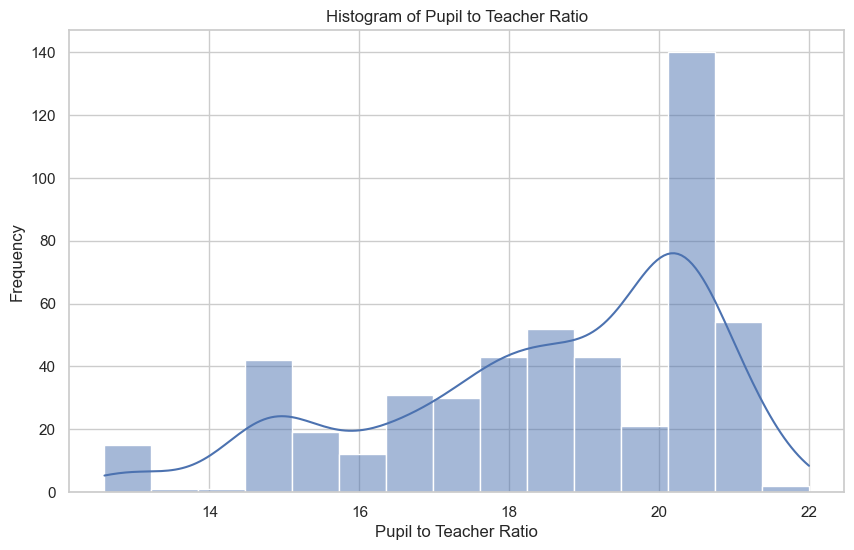

In [18]:
# 5. Histogram for PTRATIO
plt.figure(figsize=(10, 6))
sns.histplot(data['PTRATIO'], bins=15, kde=True)
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

Findings from Visualizations:

1. Boxplot of Median Value of Owner-Occupied Homes (MEDV)

The boxplot shows the distribution of median home values. There are a few outliers with higher values, but most values are concentrated around the middle of the distribution, with the median around $21,000.


2. Bar Plot of Charles River Variable (CHAS)

The bar plot indicates that most homes in the dataset are not bounded by the Charles River (CHAS = 0). Only a small number of homes are bounded by the river (CHAS = 1).

3. Boxplot of Median Value by Age Groups

The boxplot shows the distribution of median home values across different age groups of homes. Homes older than 70 years tend to have a wider range of median values, while homes between 35 and 70 years show a slightly lower median value.

4. Scatter Plot of Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres

The scatter plot indicates a positive relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS). This suggests that areas with higher industrial activity tend to have higher Nitric oxide concentrations.

5. Histogram of Pupil to Teacher Ratio (PTRATIO)

The histogram shows the distribution of the pupil-to-teacher ratio. The data is slightly right-skewed, with most ratios falling between 12 and 22.

### Task 3: Statistical Tests

1. Significant difference in median value of houses bounded by the Charles River

In [19]:
from scipy.stats import ttest_ind

# Split data into two groups
chas_0 = data[data['CHAS'] == 0]['MEDV']
chas_1 = data[data['CHAS'] == 1]['MEDV']

# Perform t-test
t_stat, p_value = ttest_ind(chas_0, chas_1)

# Display the results
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median value of houses bounded by the Charles River.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median value of houses bounded by the Charles River.")


T-Statistic: -3.996437466090509, P-Value: 7.390623170519905e-05
Reject the null hypothesis: There is a significant difference in median value of houses bounded by the Charles River.


2. Difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)

In [20]:
from scipy.stats import f_oneway

# Perform ANOVA
anova_result = f_oneway(data[data['AGE_group'] == '<= 35 years']['MEDV'],
                        data[data['AGE_group'] == '35-70 years']['MEDV'],
                        data[data['AGE_group'] == '> 70 years']['MEDV'])

# Display the results
print(f"F-Statistic: {anova_result.statistic}, P-Value: {anova_result.pvalue}")

# Conclusion
if anova_result.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference in median values of houses for different age groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median values of houses for different age groups.")


F-Statistic: 30.566839914861454, P-Value: 3.435569235360708e-13
Reject the null hypothesis: There is a significant difference in median values of houses for different age groups.


3. Relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [21]:
from scipy.stats import pearsonr

# Perform Pearson correlation
corr, p_value = pearsonr(data['NOX'], data['INDUS'])

# Display the results
print(f"Pearson Correlation Coefficient: {corr}, P-Value: {p_value}")

# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.")


Pearson Correlation Coefficient: 0.7636514469209149, P-Value: 7.913361061242812e-98
Reject the null hypothesis: There is a significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.


4. Impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes

In [22]:
import statsmodels.api as sm

# Define the independent variable and the dependent variable
X = data['DIS']
y = data['MEDV']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Perform the regression analysis
model = sm.OLS(y, X).fit()

# Display the results
print(model.summary())

# Conclusion
print(f"The coefficient for DIS is {model.params['DIS']}, indicating that an additional weighted distance to the five Boston employment centres has an impact of {model.params['DIS']} on the median value of owner-occupied homes.")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 15 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        22:05:59   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0